In [1]:
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()  #载入数据集
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [2]:
#导入模块
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris

In [6]:
#载入iris数据集
iris = load_iris()

#选用第一个和第三个特征作为X
X = iris.data[:, [0, 2]]

#选用target作为label
y = iris.target

#设定最大深度为4 的分类决策树
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=5)

#拟合数据
clf = clf.fit(X, y)

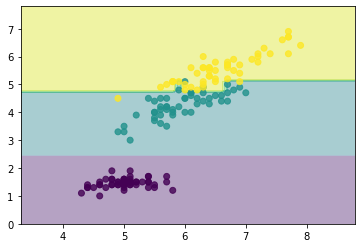

In [7]:
#提取特征的min和max
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 
#一维数组np.meshgrid生成网格点坐标矩阵xx和yy
#第一列花萼长度数据按h取等分作为行，并复制多行得到xx网格矩阵
#再把第二列花萼宽度数据按h取等分，作为列，并复制多列得到yy网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
 
#调用ravel()函数将xx和yy的两个矩阵转变成一维数组
#调用np.c_[]函数组合成一个二维数组进行预测
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
#调用reshape()函数修改形状，将其Z转换为两个特征（长度和宽度）
Z = Z.reshape(xx.shape)
 
#plt.contourf绘制等高线
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

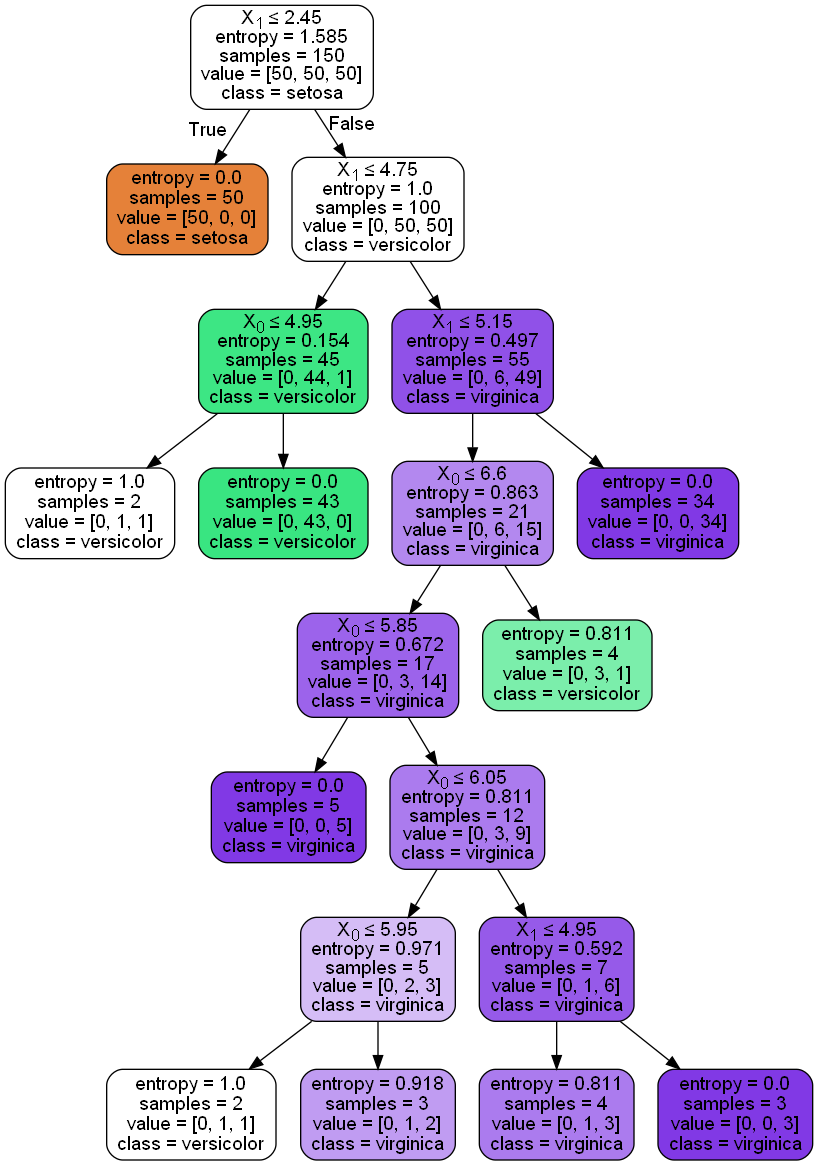

In [8]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os 

os.environ['PATH'] += os.pathsep + "D:/Program Files/Graphviz/bin"

dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())